# Load libraries

In [1]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean

In [2]:
from dask.distributed import Client
client = Client()
client

2022-07-06 20:42:02,434 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-7k60mxrj', purging
2022-07-06 20:42:02,434 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-n54avrxd', purging
2022-07-06 20:42:02,435 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-a0ytvnhv', purging
2022-07-06 20:42:02,435 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-7h10cy1h', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 15.48 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37727,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 15.48 GiB
Comm: tcp://127.0.0.1:38963,Total threads: 3
Dashboard: http://127.0.0.1:38337/status,Memory: 3.87 GiB
Nanny: tcp://127.0.0.1:39739,


# Load datasets

In [3]:
msl_ds = xr.open_dataset("../data_raw/era5slvmonthhour-costa/mslp.grib", 
                           chunks = {'time': '500MB'},
                           engine = "cfgrib")
msl_ds

Ignoring index file '../data_raw/era5slvmonthly-costa/mslp.grib.923a8.idx' incompatible with GRIB file


<xarray.Dataset>
Dimensions:     (time: 4608, latitude: 41, longitude: 41)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1990-01-01 ... 2005-12-01T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 17.0 16.75 16.5 16.25 ... 7.75 7.5 7.25 7.0
  * longitude   (longitude) float64 -91.0 -90.75 -90.5 ... -81.5 -81.25 -81.0
    valid_time  (time) datetime64[ns] dask.array<chunksize=(4608,), meta=np.ndarray>
Data variables:
    msl         (time, latitude, longitude) float32 dask.array<chunksize=(4608, 41, 41), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-07-06T20:42 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
lai_files = glob.glob("../data_raw/c3slaiv3-global/*.nc")
lai_files.sort()
lai_files

['../data_raw/c3slaiv3-global/c3s_LAI_19900710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19910710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19920710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19930710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19940710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19950710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19960710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19970710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19980710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19990710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_20000710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_20010710000000_GLOBE_AVHRR-NOAA16_V3.0

In [8]:
lai_ds = xr.open_mfdataset(lai_files, 
                           chunks = {'time': '500MB'},
                           engine = "netcdf4")
lai_ds

<xarray.Dataset>
Dimensions:         (time: 16, lon: 10800, lat: 4200)
Coordinates:
  * time            (time) datetime64[ns] 1990-07-10 1991-07-10 ... 2005-07-10
  * lon             (lon) float64 -180.0 -180.0 -179.9 ... 179.9 179.9 180.0
  * lat             (lat) float64 80.0 79.97 79.93 79.9 ... -59.9 -59.93 -59.97
Data variables:
    crs             (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    LAI             (time, lat, lon) float32 dask.array<chunksize=(1, 4200, 10800), meta=np.ndarray>
    LAI_ERR         (time, lat, lon) float32 dask.array<chunksize=(1, 4200, 10800), meta=np.ndarray>
    retrieval_flag  (time, lat, lon) float64 dask.array<chunksize=(1, 4200, 10800), meta=np.ndarray>
Attributes: (12/29)
    time_coverage_end:    1990-07-10T23:59:59Z
    time_coverage_start:  1990-06-20T00:00:00Z
    platform:             AVHRR2
    sensor:               NOAA11
    Conventions:          CF-1.6
    archive_facility:     VITO
    ...                   ...
    comment:              Please refer to Product user Guide for more informa...
    contact:              tip(at)FastOpt.com
    summary:              This file contains the Essential Climate Variable (...
    tiptable_version:     V1.3
    date_created:         2021-03-15
    tracking_id:          ef398629-0cf5-4dc3-a7bf-1e2e6be1fda2

# msl: shift lat and lon coordinates so they represent centre rather than top left of each grid cell, then downsample using coarsen

In [37]:
msl_da = msl_ds["msl"]
msl_da = (msl_da
          .assign_coords({"latitude": msl_da.latitude - 0.125,
                          "longitude": msl_da.longitude + 0.125})
         )
msl_da

<xarray.DataArray 'msl' (time: 4608, latitude: 41, longitude: 41)>
dask.array<open_dataset-db585563dab794b71f94d47adf032f38msl, shape=(4608, 41, 41), dtype=float32, chunksize=(4608, 41, 41), chunktype=numpy.ndarray>
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1990-01-01 ... 2005-12-01T23:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 16.88 16.62 16.38 16.12 ... 7.375 7.125 6.875
  * longitude   (longitude) float64 -90.88 -90.62 -90.38 ... -81.12 -80.88
    valid_time  (time) datetime64[ns] dask.array<chunksize=(4608,), meta=np.ndarray>
Attributes:
    GRIB_paramId:                             151
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1681
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  41
    GRIB_Ny:                                  41
    GRIB_cfName:                              air_pressure_at_mean_sea_level
    GRIB_cfVarName:                           msl
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_iDirectionIncrementInDegrees:        0.25
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.25
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   17.0
    GRIB_latitudeOfLastGridPointInDegrees:    7.0
    GRIB_longitudeOfFirstGridPointInDegrees:  -91.0
    GRIB_longitudeOfLastGridPointInDegrees:   -81.0
    GRIB_missingValue:                        9999
    GRIB_name:                                Mean sea level pressure
    GRIB_shortName:                           msl
    GRIB_totalNumber:                         0
    GRIB_units:                               Pa
    long_name:                                Mean sea level pressure
    units:                                    Pa
    standard_name:                            air_pressure_at_mean_sea_level

In [27]:
msl_da = msl_da.coarsen(latitude=2, longitude=2, boundary="trim").mean()
msl_da

<xarray.DataArray 'msl' (time: 4608, latitude: 20, longitude: 20)>
dask.array<mean_agg-aggregate, shape=(4608, 20, 20), dtype=float32, chunksize=(4608, 20, 20), chunktype=numpy.ndarray>
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1990-01-01 ... 2005-12-01T23:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 16.75 16.25 15.75 15.25 ... 8.25 7.75 7.25
  * longitude   (longitude) float64 -90.75 -90.25 -89.75 ... -81.75 -81.25
    valid_time  (time) datetime64[ns] dask.array<chunksize=(4608,), meta=np.ndarray>
Attributes:
    GRIB_paramId:                             151
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1681
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  41
    GRIB_Ny:                                  41
    GRIB_cfName:                              air_pressure_at_mean_sea_level
    GRIB_cfVarName:                           msl
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_iDirectionIncrementInDegrees:        0.25
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.25
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   17.0
    GRIB_latitudeOfLastGridPointInDegrees:    7.0
    GRIB_longitudeOfFirstGridPointInDegrees:  -91.0
    GRIB_longitudeOfLastGridPointInDegrees:   -81.0
    GRIB_missingValue:                        9999
    GRIB_name:                                Mean sea level pressure
    GRIB_shortName:                           msl
    GRIB_totalNumber:                         0
    GRIB_units:                               Pa
    long_name:                                Mean sea level pressure
    units:                                    Pa
    standard_name:                            air_pressure_at_mean_sea_level

# lai: shift lat and lon coordinates so they represent centre rather than top left of each grid cell, then downsample using coarsen

In [33]:
lai_da = lai_ds["LAI"].sel(lat = slice(17.001, 7), lon = slice(-91.001, -81))
lai_da = (lai_da
          .assign_coords({"lat": lai_da.lat - 1/60,
                          "lon": lai_da.lon + 1/60,
                          "time": lai_da.time.dt.strftime("%b-%Y")})
         )
lai_da

<xarray.DataArray 'LAI' (time: 16, lat: 301, lon: 301)>
dask.array<getitem, shape=(16, 301, 301), dtype=float32, chunksize=(1, 301, 301), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 'Jul-1990' 'Jul-1991' ... 'Jul-2004' 'Jul-2005'
  * lon      (lon) float64 -90.98 -90.95 -90.92 -90.88 ... -81.05 -81.02 -80.98
  * lat      (lat) float64 16.98 16.95 16.92 16.88 ... 7.083 7.05 7.017 6.983
Attributes:
    long_name:      Effective Leaf Area Index 4km
    grid_mapping:   crs
    standard_name:  leaf_area_index
    units:          m2.m-2
    valid_range:    [    0 65534]

In [32]:
lai_da = lai_da.coarsen(lat=15, lon=15, boundary="trim").mean()
lai_da

<xarray.DataArray 'LAI' (time: 16, lat: 20, lon: 20)>
dask.array<mean_agg-aggregate, shape=(16, 20, 20), dtype=float32, chunksize=(1, 20, 20), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1990-07-10 1991-07-10 ... 2005-07-10
  * lon      (lon) float64 -90.75 -90.25 -89.75 -89.25 ... -82.25 -81.75 -81.25
  * lat      (lat) float64 16.75 16.25 15.75 15.25 14.75 ... 8.75 8.25 7.75 7.25
Attributes:
    long_name:      Effective Leaf Area Index 4km
    grid_mapping:   crs
    standard_name:  leaf_area_index
    units:          m2.m-2
    valid_range:    [    0 65534]

# Putting things together

In [1]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean
from dask.distributed import Client

In [2]:
client = Client()
client

2022-07-07 15:24:55,692 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-t41s7ouo', purging
2022-07-07 15:24:55,692 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-m9n_p_ic', purging
2022-07-07 15:24:55,692 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-7ex84gp7', purging
2022-07-07 15:24:55,692 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/dask-worker-space/worker-bwwzkr78', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 15.48 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33293,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 15.48 GiB
Comm: tcp://127.0.0.1:34407,Total threads: 3
Dashboard: http://127.0.0.1:33087/status,Memory: 3.87 GiB
Nanny: tcp://127.0.0.1:34585,


In [3]:
msl_ds = xr.open_dataset("../data_raw/era5slvmonthhour-costa/mslp.grib", 
                           chunks = {'time': '500MB'},
                           engine = "cfgrib")
msl_ds = msl_ds.rename({"latitude": "lat",
               "longitude": "lon"}) # standardise names for xarray operations later

Ignoring index file '../data_raw/era5slvmonthhour-costa/mslp.grib.923a8.idx' incompatible with GRIB file


In [4]:
msl_da = msl_ds["msl"]
msl_da = (msl_da
          .assign_coords({"lat": msl_da.lat - 0.125,   # shift lat and lon coordinates by half of grid cell size since ERA5 data uses coordinates to define top left of grid cell
                          "lon": msl_da.lon + 0.125})  # whereas xarray plotting assumes coordinates refer to middle of grid cell
          .coarsen(time=24)
          .mean()                                      # monthly averaged ERA5 was obtained for each hour of the day, this averages over the hours to get average mslp over the month
          .coarsen(lat=2, lon=2, boundary="trim")      # ERA5 has 0.25 deg res while LAI has 1/30 deg res, lcm of these is 0.5 deg
          .mean()                                      # downsample the resolution to 0.5 deg by averaging over 4 grid cells (2 lat x 2 lon)
         )
msl_da = msl_da.assign_coords({"time": msl_da.time.dt.strftime("%b-%Y")}) # standardise coordinates for xarray operations later

In [5]:
lat_coords = msl_da["lat"].data
lon_coords = msl_da["lon"].data

In [6]:
lai_files = glob.glob("../data_raw/c3slaiv3-global/*.nc")
lai_files.sort()
lai_ds = xr.open_mfdataset(lai_files, 
                           chunks = {'time': '500MB'},
                           engine = "netcdf4")

In [7]:
lai_da = lai_ds["LAI"].sel(lat = slice(17.001, 7), lon = slice(-91.001, -81))
lai_da = (lai_da
          .assign_coords({"lat": lai_da.lat - 1/60, # shift lat and lon coordinates by half of grid cell size since ERA5 data uses coordinates to define top left of grid cell
                          "lon": lai_da.lon + 1/60, # whereas xarray plotting assumes coordinates refer to middle of grid cell
                          "time": lai_da.time.dt.strftime("%b-%Y")}) # standardise coordinates for xarray operations later
          .coarsen(lat=15, lon=15, boundary="trim") # ERA5 has 0.25 deg res while LAI has 1/30 deg res, lcm of these is 0.5 deg
          .mean()                                   # downsample the resolution to 0.5 deg by averaging over 225 grid cells (15 lat x 15 lon)
         )
lai_da = lai_da.assign_coords({"lat": lat_coords, "lon": lon_coords}) # standardise coordinates for xarray operations later (this line is to avoid point errors)

In [ ]:
msl_da, lai_da = xr.align(msl_da, lai_da, join = "inner") # perform inner join

# Correlation and information flow plots

Results below show a negative correlation between LAI and MSLP for most grid points. This could be interpreted as:
1. Increase in LAI causes decrease in MSLP and decrease in LAI causes increase in MSLP (mechanism: additional transpiration and biogenic aerosols from vegetation facilitate water vapour condensation which leads to drop in air pressure, or higher sensible heat flux producing greater uplift to leave behind a low pressure region; in either case vegetation is implicated)
2. Decrease in MSLP causes increase in LAI and increase in MSLP causes decrease in LAI (mechanism: drop in air pressure due to other reasons draws in wind to push clouds and precipitation inland for vegetation growth)
3. A third confounding factor causes LAI and MSLP to move inversely (mechanism: higher solar intensity or land temperatures allow vegetation to grow but also for air to rise and leave behind a low pressure region)
4. These are just spurious correlations

To evaluate intepretation 2, we can make plots where grids use only the years where LAI was increasing, or was decreasing. In this case we know most of the LAI decrease was due to deforestation by humans rather than a change in atmospheric conditions. If the correlation holds for the years where LAI was decreasing, then this eliminates the second half of this interpretation (that a decrease in MSLP causes an increase in LAI). This is unless we argue that human activity during these periods have simultaneously caused a decrease in LAI (deforestation) and MSLP. But a mechanism for the latter still needs to be articulated, and be able to explain why these patterns are localised in space. Since the only proposed mechanism which seems to explain this localised pattern is the one in interpretation 1, this is the one we default to if interpretations 2, 3 and 4 all have evidence to the contrary.

If the correlational pattern is similar for both groups (whether LAI was increasing or decreasing), this would suggest (though not conclusively) that there is a common mechanism mediating LAI/MSLP regardless of whether LAI is increasing or decreasing. As the proposed mechanism here is that there are air pressure changes by external influences which end up determining vegetation growth via winds bringing in precipitating clouds, if we have eliminated the second half of interpretation 2 then this constitutes evidence against the mechanism itself and hence calls into question the validity of the first half of interpretation 2.

Interpretation 3 can be controlled to some extent by selection of study regions with relatively consistent temperature (such as countries near the equator). To evaluate interpretation 3, we can use a similar approach as described previously for interpretation 2 whereby we compare the correlational pattern in years of increasing and decreasing LAI. Again, most LAI decrease has been due to deforestation rather than a drop in temperature (temperatures near the equator do not fluctuate as much). And if the correlational pattern is similar across years of increasing and decreasing LAI, then this undermines the proposed mechanism.

To evaluate interpretation 4, we can compute p-values for the correlation at each grid cell and mask the correlation values accordingly. Given the large number of grid cells, care must be taken since a p-value of say 0.05 will still be expected to turn up a spurious correlation 1 in 20 times. So when evaluating the chance of spurious correlations on a region-wide level, analysis must consider the *fraction* of the total number of grid cells and make sure that this is a lot greater than the p-value chosen. To assist in this, a wider time range and higher temporal resolution can be used. Furthermore, cross-country comparisons can be made and if this correlation holds across regions of different climates then this would constitute some evidence against it being a spurious correlation.

Another method which evaluates all four interpretations simultaneously is the use of the information flow metric, which can actually indicate the direction of causality.

In summary, if we are able to establish that a similar correlation pattern holds across samples calculated upon years of increasing and decreasing LAI, and do so in countries near the equator where temperature is relatively consistent, then it is unlikely that interpretations 2 and 3 are valid. If we are furthermore able to demonstrate that the p-values for these correlations are significant on a region-wide level, and better yet holds across regions of different climates, then there is also reason to reject interpretation 4. In this case, interpretation 1 then becomes the most reasonable interpretation and the one we default to. This is unless someone can propose another counfounding mechanism which better explains these correlational patterns, or can successfully defend interpretation 2 by articulating another mechanism by which human activity could have increased MSLP and did so contemporaneously with deforestation (decrease in LAI).

CPU times: user 351 ms, sys: 47.6 ms, total: 399 ms
Wall time: 2.08 s


/home/anthony/anaconda3/envs/thesis/lib/python3.10/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/anthony/anaconda3/envs/thesis/lib/python3.10/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


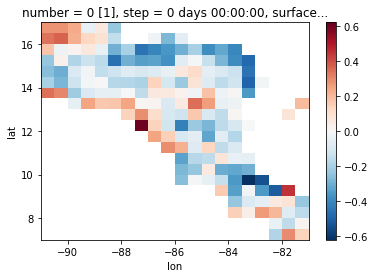

In [8]:
%%time
cor = xr.corr(msl_da, lai_da, dim = "time")
cor.plot()

/home/anthony/anaconda3/envs/thesis/lib/python3.10/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


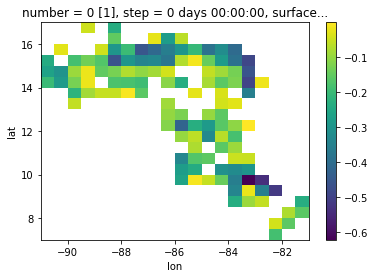

In [9]:
cor.where(cor.data < 0).plot()

/home/anthony/anaconda3/envs/thesis/lib/python3.10/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


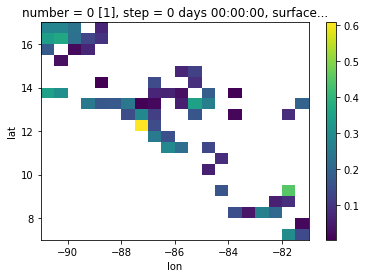

In [10]:
cor.where(cor.data > 0).plot()

CPU times: user 298 ms, sys: 9.4 ms, total: 307 ms
Wall time: 1.53 s


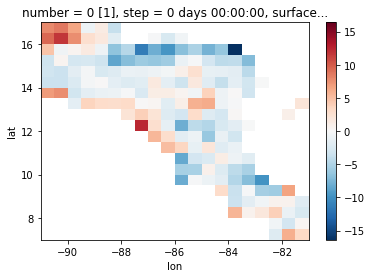

In [11]:
%%time
cov = xr.cov(msl_da, lai_da, dim = "time")
cov.plot()

In [18]:
# Calculate difference approximations using Euler forward scheme (for input into information flow formula)

k = 1 # step size for euler forward scheme
deltat = 1 # time between each step in years

msl_da_trun = msl_da.isel(time=slice(0,-1))
msl_da_forw = msl_da.isel(time=slice(1, None)).assign_coords({"time": msl_da_trun.time})
msl_da_diff = (msl_da_forw - msl_da_trun) / (k * deltat) # difference approximation for time derivative of MSLP using Euler forward scheme

lai_da_trun = lai_da.isel(time=slice(0,-1))
lai_da_forw = lai_da.isel(time=slice(1, None)).assign_coords({"time": lai_da_trun.time})
lai_da_diff = (lai_da_forw - lai_da_trun) / (k * deltat) # difference approximation for time derivative of LAI using Euler forward scheme

In [35]:
# Calculate covariances for information flow
# index 1 is used for MSLP while index 2 is used for LAI

c11 = xr.cov(msl_da_trun, msl_da_trun, dim = "time")
c12 = xr.cov(msl_da_trun, lai_da_trun, dim = "time")
c21 = xr.cov(lai_da_trun, msl_da_trun, dim = "time")
c22 = xr.cov(lai_da_trun, lai_da_trun, dim = "time")
c1d1 = xr.cov(msl_da_trun, msl_da_diff, dim = "time")
c1d2 = xr.cov(msl_da_trun, lai_da_diff, dim = "time")
c2d1 = xr.cov(lai_da_trun, msl_da_diff, dim = "time")
c2d2 = xr.cov(lai_da_trun, lai_da_diff, dim = "time")

In [36]:
# Calculate information flow

t21 = (c11*c12*c2d1 - c12*c12*c1d1) / (c11*c11*c22 - c11*c12*c12) # from LAI to MSLP
t12 = (c22*c21*c1d2 - c21*c21*c2d2) / (c22*c22*c11 - c22*c21*c21) # from MSLP to LAI

CPU times: user 282 ms, sys: 37.2 ms, total: 319 ms
Wall time: 1.57 s


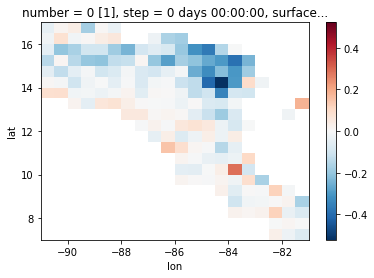

In [34]:
%%time
t21.plot()

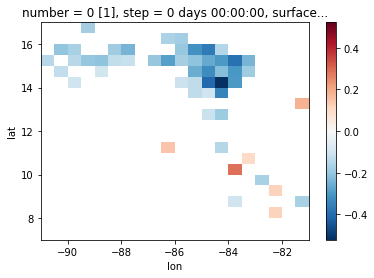

In [44]:
t21.where((t21.data > 0.1) | (t21.data < -0.1)).plot()

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 12.9 µs


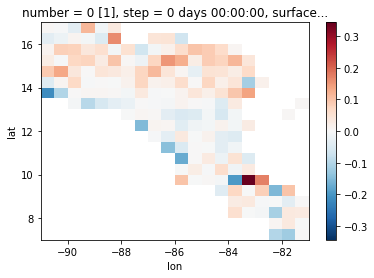

In [37]:
%time
t12.plot()

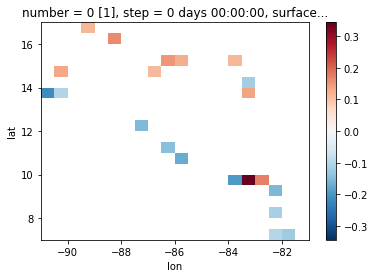

In [45]:
t12.where((t12.data > 0.1) | (t12.data < -0.1)).plot()

### k = n

In [178]:
# Import libraries

import glob
import xarray as xr
import xskillscore as xs
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import hvplot.xarray
import dask
from dask.distributed import Client

In [179]:
# Load datasets

msl_ds = xr.open_dataset("../data_raw/era5slvmonthhour-costa/mslp.grib", 
                           chunks = {'time': '500MB'},
                           engine = "cfgrib")
msl_ds = msl_ds.rename({"latitude": "lat",
               "longitude": "lon"}) # standardise names for xarray operations later

lai_files = glob.glob("../data_raw/c3slaiv3-global/*.nc")
lai_files.sort()
lai_ds = xr.open_mfdataset(lai_files, 
                           chunks = {'time': '500MB'},
                           engine = "netcdf4")

Ignoring index file '../data_raw/era5slvmonthhour-costa/mslp.grib.923a8.idx' incompatible with GRIB file


In [186]:
# Regrid and align data arrays

msl_da = msl_ds["msl"]
msl_da = (msl_da
          .assign_coords({"lat": msl_da.lat - 0.125,   # shift lat and lon coordinates by half of grid cell size since ERA5 data uses coordinates to define top left of grid cell
                          "lon": msl_da.lon + 0.125})  # whereas xarray plotting assumes coordinates refer to middle of grid cell
          .coarsen(time=24)
          .mean()                                      # monthly averaged ERA5 was obtained for each hour of the day, this averages over the hours to get average mslp over the month
          .coarsen(lat=2, lon=2, boundary="trim")      # ERA5 has 0.25 deg res while LAI has 1/30 deg res, lcm of these is 0.5 deg
          .mean()                                      # downsample the resolution to 0.5 deg by averaging over 4 grid cells (2 lat x 2 lon)
         )
msl_da = msl_da.assign_coords({"time": msl_da.time.dt.strftime("%b-%Y")}) # standardise coordinates for xarray operations later

lat_coords = msl_da["lat"].data
lon_coords = msl_da["lon"].data

lai_da = lai_ds["LAI"].sel(lat = slice(17.001, 7), lon = slice(-91.001, -81))
lai_da = (lai_da
          .assign_coords({"lat": lai_da.lat - 1/60, # shift lat and lon coordinates by half of grid cell size since ERA5 data uses coordinates to define top left of grid cell
                          "lon": lai_da.lon + 1/60, # whereas xarray plotting assumes coordinates refer to middle of grid cell
                          "time": lai_da.time.dt.strftime("%b-%Y")}) # standardise coordinates for xarray operations later
          .coarsen(lat=15, lon=15, boundary="trim") # ERA5 has 0.25 deg res while LAI has 1/30 deg res, lcm of these is 0.5 deg
          .mean()                                   # downsample the resolution to 0.5 deg by averaging over 225 grid cells (15 lat x 15 lon)
         )
lai_da = lai_da.assign_coords({"lat": lat_coords, "lon": lon_coords}) # standardise coordinates for xarray operations later (this line is to avoid point errors)

msl_da, lai_da = xr.align(msl_da, lai_da, join = "inner") # perform inner join
# msl_da = msl_da.chunk(dict(time=-1))
# lai_da = msl_da.chunk(dict(time=-1))

In [194]:
# Calculate correlation

# cor = xr.corr(msl_da, lai_da, dim = "time")

p = 0.2 # set p-value to deem significance

cor_p_r = xs.pearson_r(msl_da.chunk(dict(time=-1)), lai_da.chunk(dict(time=-1)), dim = 'time') # Pearson's correlation coefficient
cor_p_p = xs.pearson_r_p_value(msl_da.chunk(dict(time=-1)), lai_da.chunk(dict(time=-1)), dim = 'time') # p-value for Pearson's correlation
cor_p = cor_p_r.where(cor_p_p < p)

cor_s_r = xs.spearman_r(msl_da.chunk(dict(time=-1)), lai_da.chunk(dict(time=-1)), dim = 'time') # Spearman's correlation coefficient
cor_s_p = xs.spearman_r_p_value(msl_da.chunk(dict(time=-1)), lai_da.chunk(dict(time=-1)), dim = 'time') # p-value for Spearman's correlation
cor_s = cor_s_r.where(cor_s_p < p)

# Calculate difference approximations using Euler forward scheme (for input into information flow formula)

k = 1 # step size for euler forward scheme
deltat = 1 # time between each step in years

msl_da_trun = msl_da.isel(time=slice(0,-k))
msl_da_forw = msl_da.isel(time=slice(k, None)).assign_coords({"time": msl_da_trun.time})
msl_da_diff = (msl_da_forw - msl_da_trun) / (k * deltat) # difference approximation for time derivative of MSLP using Euler forward scheme

lai_da_trun = lai_da.isel(time=slice(0,-k))
lai_da_forw = lai_da.isel(time=slice(k, None)).assign_coords({"time": lai_da_trun.time})
lai_da_diff = (lai_da_forw - lai_da_trun) / (k * deltat) # difference approximation for time derivative of LAI using Euler forward scheme

# Calculate covariances for information flow
# index 1 is used for MSLP while index 2 is used for LAI

c11 = xr.cov(msl_da_trun, msl_da_trun, dim = "time")
c12 = xr.cov(msl_da_trun, lai_da_trun, dim = "time")
c21 = xr.cov(lai_da_trun, msl_da_trun, dim = "time")
c22 = xr.cov(lai_da_trun, lai_da_trun, dim = "time")
c1d1 = xr.cov(msl_da_trun, msl_da_diff, dim = "time")
c1d2 = xr.cov(msl_da_trun, lai_da_diff, dim = "time")
c2d1 = xr.cov(lai_da_trun, msl_da_diff, dim = "time")
c2d2 = xr.cov(lai_da_trun, lai_da_diff, dim = "time")

# Calculate information flow

t21 = (c11*c12*c2d1 - c12*c12*c1d1) / (c11*c11*c22 - c11*c12*c12) # from LAI to MSLP
t12 = (c22*c21*c1d2 - c21*c21*c2d2) / (c22*c22*c11 - c22*c21*c21) # from MSLP to LAI

In [163]:
# Open dask client

client = Client()
client

/home/anthony/anaconda3/envs/thesis/lib/python3.10/site-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33937 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:33937/status,
Dashboard: http://127.0.0.1:33937/status,Workers: 4
Total threads: 12,Total memory: 15.48 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45439,Workers: 4
Dashboard: http://127.0.0.1:33937/status,Total threads: 12
Started: Just now,Total memory: 15.48 GiB
Comm: tcp://127.0.0.1:46843,Total threads: 3
Dashboard: http://127.0.0.1:34311/status,Memory: 3.87 GiB
Nanny: tcp://127.0.0.1:35309,


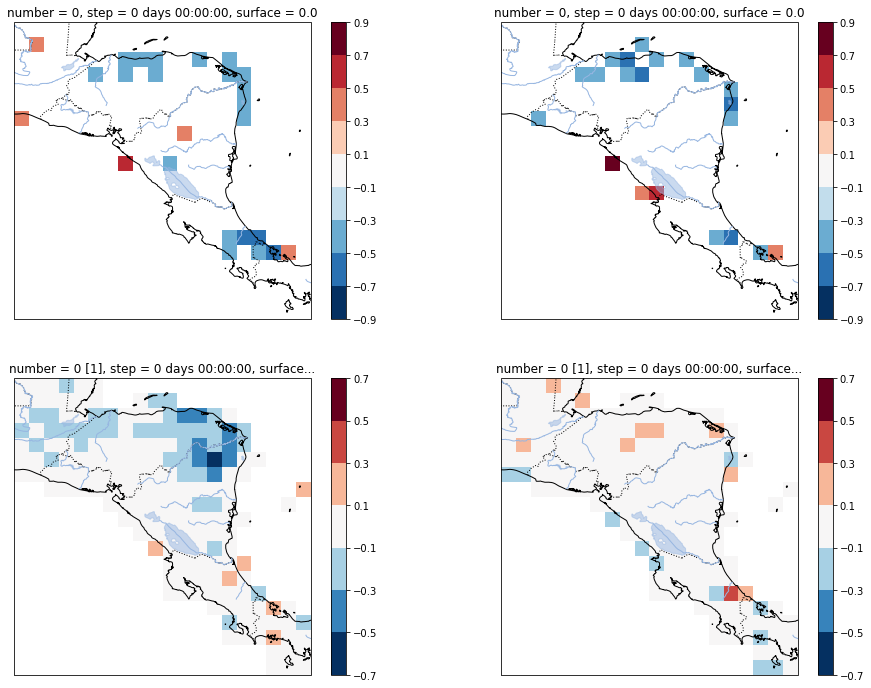

In [195]:
fig = plt.figure(figsize=[16, 12])

ax1 = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
cor_p.plot(ax = ax1, cmap="RdBu_r",  levels = np.arange(-0.9, 0.91, 0.2))
ax1.set_extent([-91, -81, 7, 17], crs=ccrs.PlateCarree())
#ax1.add_feature(cfeature.LAND)
#ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.add_feature(cfeature.RIVERS)

ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())
cor_s.plot(ax = ax2, cmap="RdBu_r",  levels = np.arange(-0.9, 0.91, 0.2))
ax2.set_extent([-91, -81, 7, 17], crs=ccrs.PlateCarree())
#ax2.add_feature(cfeature.LAND)
#ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAKES, alpha=0.5)
ax2.add_feature(cfeature.RIVERS)

ax3 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree())
t21.plot(ax = ax3, cmap="RdBu_r",  levels = np.arange(-0.7, 0.71, 0.2))
ax3.set_extent([-91, -81, 7, 17], crs=ccrs.PlateCarree())
#ax3.add_feature(cfeature.LAND)
#ax3.add_feature(cfeature.OCEAN)
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.LAKES, alpha=0.5)
ax3.add_feature(cfeature.RIVERS)

ax4 = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree())
t12.plot(ax = ax4, cmap="RdBu_r",  levels = np.arange(-0.7, 0.71, 0.2))
ax4.set_extent([-91, -81, 7, 17], crs=ccrs.PlateCarree())
#ax4.add_feature(cfeature.LAND)
#ax4.add_feature(cfeature.OCEAN)
ax4.add_feature(cfeature.COASTLINE)
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.add_feature(cfeature.LAKES, alpha=0.5)
ax4.add_feature(cfeature.RIVERS)

plt.show()

In [162]:
client.close()

CPU times: user 362 ms, sys: 35.2 ms, total: 398 ms
Wall time: 1.58 s


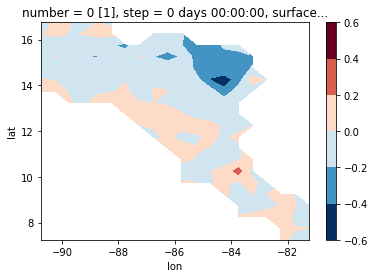

In [71]:
%%time
t21.plot.contourf(levels = np.arange(-0.6, 0.61, 0.2))

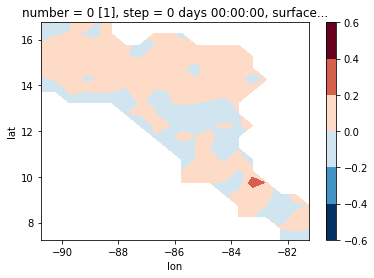

In [72]:
t12.plot.contourf(levels = np.arange(-0.6, 0.61, 0.2))

CPU times: user 375 ms, sys: 35.1 ms, total: 411 ms
Wall time: 1.65 s


(<matplotlib.contour.QuadContourSet at 0x7f14fd87f4c0>,)

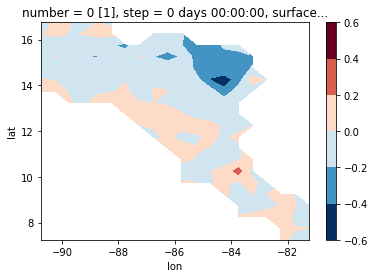

In [48]:
%%time
dask.compute(t21.plot.contourf())

In [50]:
%%time
dask.compute(t21.hvplot.contourf())

CPU times: user 938 ms, sys: 75.8 ms, total: 1.01 s
Wall time: 3.21 s


(:Polygons   [lon,lat]   (value),)

In [52]:
t21.hvplot.contourf(cmap=cmocean.cm.haline_r)

TypeError: argument of type 'LinearSegmentedColormap' is not iterable

### Results are qualitatively about the same for k = 1 and k = 2, therefore just use k = 1

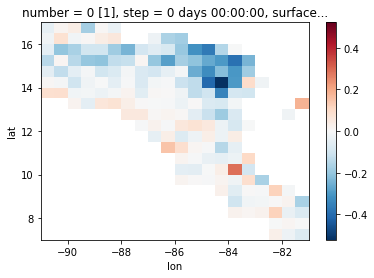

In [9]:
# k = 1
t21.plot()

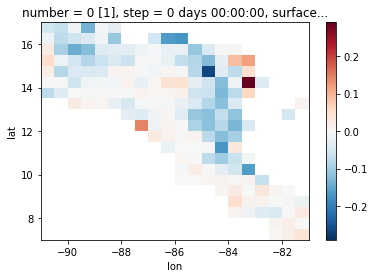

In [17]:
# k = 2
t21.plot()

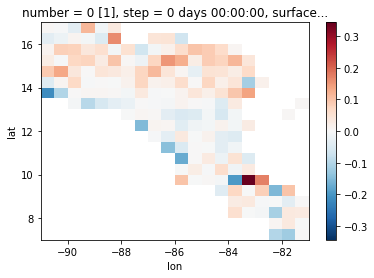

In [10]:
# k = 1
t12.plot()

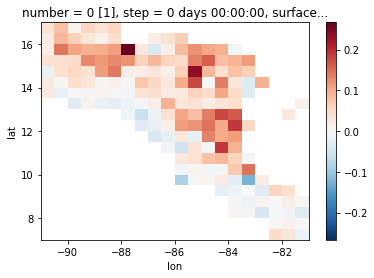

In [18]:
# k = 2
t12.plot() 

In [27]:
lai_da_downsamp = (lai_da
                   .coarsen(lat=3, lon=3, boundary="trim")
                   .mean())

In [ ]:
lai_da_downsamp = (lai_da
                   .coarsen(lat=3, lon=3)
                   .mean())

lai_da_downsamp = (lai_da_downsamp
                   .assign_coords({
                       "lat" : np.round(lai_da_downsamp.lat - 1/30, 2),
                       "lon" : np.round(lai_da_downsamp.lon + 1/30, 2)})
                   .pad(pad_width = {"lat": (1, 0), "lon": (1, 0)}, mode = "constant", constant_values = {"lat": (0, 0), "lon": (0, 0)}))

lai_da_downsamp = (lai_da_downsamp
                   .assign_coords({
                       "lat" : lai_da_downsamp.lat.isel(lat = slice(1, None)).pad(lat=(1,0), constant_values=(17,0)),
                       "lon" : lai_da_downsamp.lon.isel(lon = slice(1, None)).pad(lon=(1,0), constant_values=(-91,0))}))

In [ ]:
lai_da_downsamp.coarsen(lat=5, lon=5, boundary = "pad").mean()

In [ ]:
lai_da_downsamp

In [14]:
client.close()